# DATA SCIENTIST HIRE

### Task: Predict The Probability of Interview to accept a job offer at a Big Data Company(Not Mentioned). Employing The  applications of Machine Learning Give Likely Reasons why Candidates May choose not to work at the company

In [305]:
#Import Needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.decomposition import *
from sklearn.cluster import *
from scipy.stats import boxcox
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE,RandomOverSampler


In [306]:
#Load Data
train_data=pd.read_csv('Data_Scientist_Hire_Train.csv',na_values='NULL')
test_data=pd.read_csv('Data_Scientist_Hire_Test.csv',na_values='NULL')
sample_submission=pd.read_csv('Sample_Submission.csv',na_values='NULL')


In [307]:
train_data[:5]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [308]:
id=test_data.enrollee_id.values
print('Train_Data_Shape: ',train_data.shape,'\n\n','Test_Data_Shape: ',test_data.shape,'\n\n','Sample_Submission_Shape: ',sample_submission.shape)

Train_Data_Shape:  (19158, 14) 

 Test_Data_Shape:  (2129, 13) 

 Sample_Submission_Shape:  (2129, 2)


In [309]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

There are a good number of Missing values as can be seen above we have to devise ways to deal with them at 

In [310]:
#Check for Duplicates in Train and Test Data
print('Train_Data: ',train_data.enrollee_id.duplicated().sum(),'Duplicates')
print('Test_Data: ',test_data.enrollee_id.duplicated().sum(),'Duplicates')

Train_Data:  0 Duplicates
Test_Data:  0 Duplicates


In [311]:
#Combine train and test data for analysis
y_train=train_data.target
data=train_data[train_data.columns[:-1]].append(test_data)
data.shape

(21287, 13)

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [313]:
#Function To Calculate Number of Missing Datapoints for each rows
def missing(x,col):
    print('Missing Values in',col,': ',(x.shape[0]-x[col].notnull().sum()))

In [314]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


## FEATURE ANALYSIS AND VISUALIZATION

In [315]:
missing(data,'training_hours')

Missing Values in training_hours :  0


In [316]:
data.training_hours.describe()

count    21287.000000
mean        65.328510
std         60.075201
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

Fig 1.0


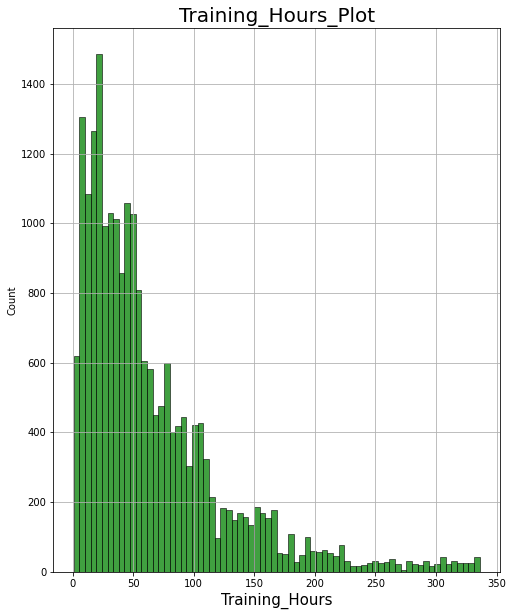

In [317]:
#Plot of Training_Hours
print('Fig 1.0')
plt.figure(figsize=(8,10))
plt.title('Training_Hours_Plot',size=20)
plt.xlabel('Training_Hours',size=15)
sns.histplot(x=data.training_hours,color='g')
plt.grid('True')
plt.show()

Majority of Candidates as can be seen from fig 1.0 spent less than 100 Hours on Training

In [318]:
missing(data,'last_new_job')

Missing Values in last_new_job :  463


In [319]:
data.last_new_job.value_counts()

1        8924
>4       3643
2        3242
never    2710
3        1157
4        1148
Name: last_new_job, dtype: int64

Fig 1.1


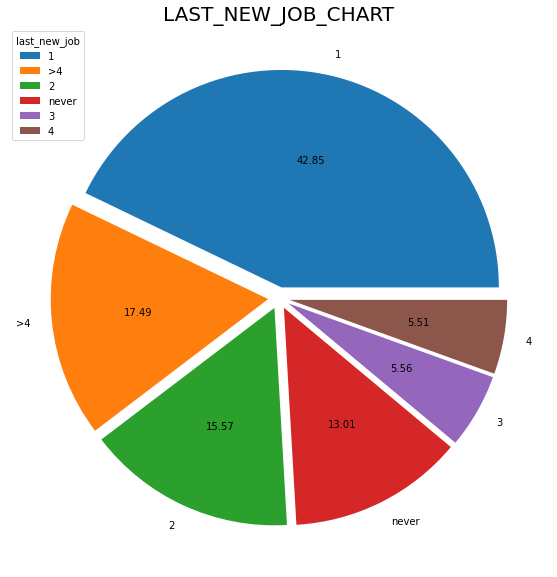

In [320]:
#Chart of New Jobs
print('Fig 1.1')
def piechart(col,x):
    " piechart(col,size);\n 'col' represents the column to be plotted it shld be entered as a string object; 'size' represents the desired figure size entered as a tuple example (5,10)"
    plt.figure(figsize=x)
    plt.title(col.upper()+'_CHART',size=20)
    plt.pie(x=data[col].value_counts().values,explode=[0.05 for x in range(len(data[col].value_counts().values))],autopct='%.2f',labels=data[col].value_counts().index)
    plt.legend(title=col,loc='best')
    plt.show()
piechart('last_new_job',(10,10))

Fig 1.1 Above is a plot of The distribution of the number of jobs previously held by candidates, Most Candidates have had just 1(One) previous job before applying to the company this represents 42% of the total candidates while candidates who have had more than 4 jobs represents 17% of the total candidates, some 13% of candidates have never had a previous job. It will be interesting to see if work experience influences candidates decision to accept an offer at the company

In [321]:
# Replace 'never' with 0, '>4' with 5 then fill missing with one
data.last_new_job.replace(['never','>4'],[0,5],inplace=True)
data.last_new_job.fillna('1',inplace=True)
data.last_new_job.astype('int64')
data.last_new_job.value_counts()

1    9387
5    3643
2    3242
0    2710
3    1157
4    1148
Name: last_new_job, dtype: int64

In [322]:
missing(data,'company_type')

Missing Values in company_type :  6774


Company type has a lot of missing values

Fig 1.2


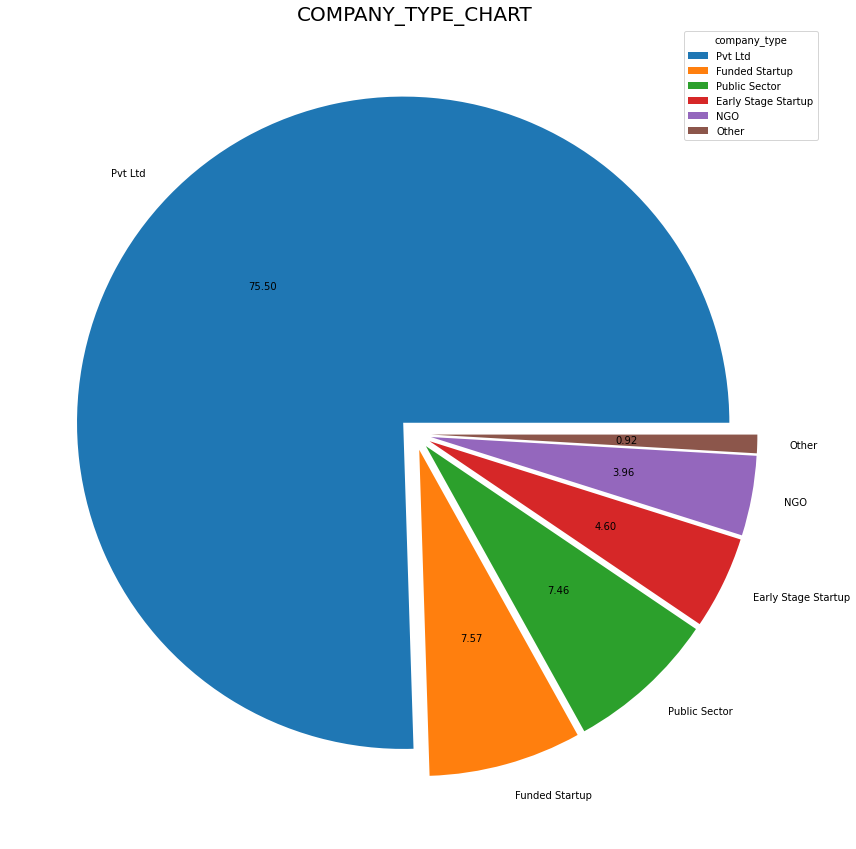

In [323]:
#Pie Plot Of Company Type
print('Fig 1.2')
piechart('company_type',(15,15))

Fig 1.2 is a plot of Comapany type feature it has  a low variance that implies that few classes occurs many time PVTLTD has 75% of the data points this can make it very uninformative and not useful to our target

In [324]:
#We will fill The missing values in company type with Pvt Ltd
data.company_type.fillna('Pvt Ltd',inplace=True)
data.company_type.replace(data.company_type.value_counts().index,[0,1,2,3,4,5],inplace=True)
data.company_type.value_counts()

0    17732
1     1098
2     1082
3      668
4      574
5      133
Name: company_type, dtype: int64

In [325]:
#missing values
missing(data,'company_size')

Missing Values in company_size :  6560


Fig 1.3


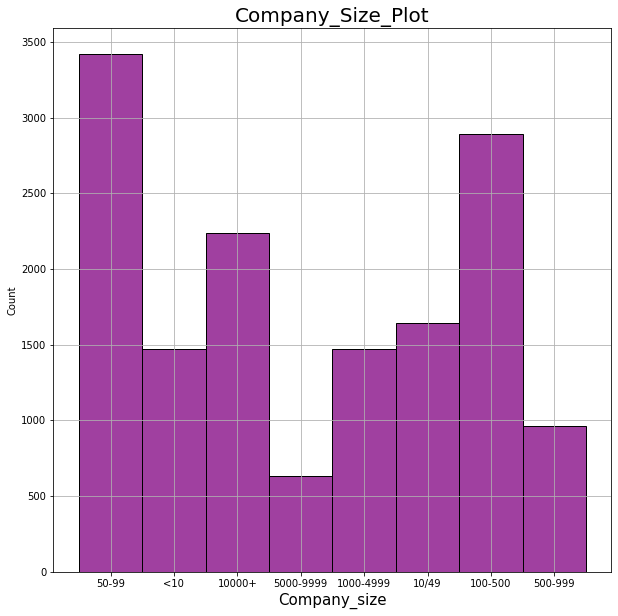

In [326]:
#Plot of Company_Size
print('Fig 1.3')
plt.figure(figsize=(10,10));
plt.title('Company_Size_Plot',size=20)
plt.xlabel('Company_size',size=15)
plt.grid('True')
sns.histplot(data.company_size[data.company_size.notnull()],color='purple')
plt.show()

In [327]:
#Replacing Values in Company Size with custom encoding
data.company_size.replace(['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'],[x for x in range(1,9)],inplace=True)
data.company_size.fillna(-1,inplace=True)
data.company_size.value_counts()

-1.0    6560
 3.0    3421
 4.0    2889
 8.0    2236
 2.0    1643
 6.0    1471
 1.0    1471
 5.0     965
 7.0     631
Name: company_size, dtype: int64

In [328]:
#Missing values
missing(data,'experience')

Missing Values in experience :  70


In [329]:
# we will replace '<1' with 0 and '>20' with 21
#Missing values will be replaced mode which is '>20'
data.experience.fillna('>20',inplace=True)
data.experience.replace(['<1','>20'],[0,21],inplace=True)
data.experience=data.experience.astype('int64')


In [330]:
data.experience.value_counts().sort_index()

0      596
1      605
2     1255
3     1508
4     1548
5     1593
6     1346
7     1144
8      884
9     1093
10    1081
11     750
12     546
13     453
14     641
15     745
16     576
17     378
18     306
19     333
20     167
21    3739
Name: experience, dtype: int64

Fig 1.4


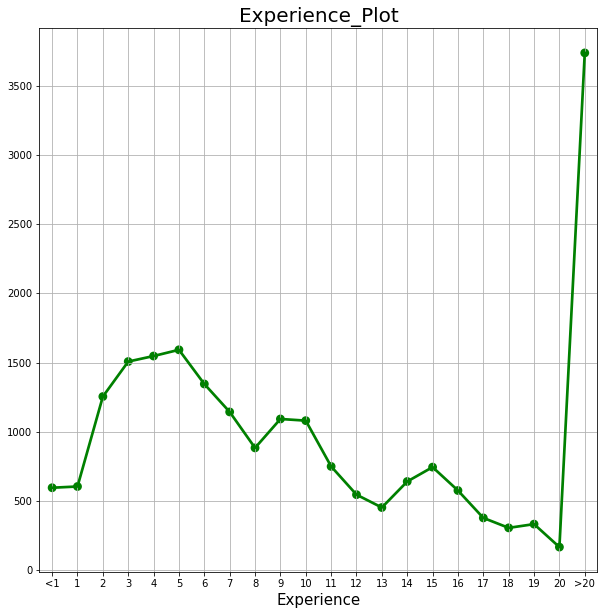

In [331]:
#Experience Plot
print('Fig 1.4')
plt.figure(figsize=(10,10))
plt.title('Experience_Plot',size=20)
sns.pointplot(x=[x for x in range(0,22)],y=data.experience.value_counts().sort_index().values,color='g')
plt.xticks([x for x in range(0,22)],['<1']+[str(x) for x in range(1,21)]+['>20'])
plt.xlabel('Experience',size=15)
plt.grid('True')
plt.show()

Candidates with 20+ years work experience accounts for much(3725 applicants) of the applicants. This group of candidates with much work experience can be said to be professionals. This can be seen from fig 1.3 plot above

In [332]:
missing(data,'major_discipline')

Missing Values in major_discipline :  3125


In [333]:
data.major_discipline.value_counts()

STEM               16113
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64

Fig 1.5


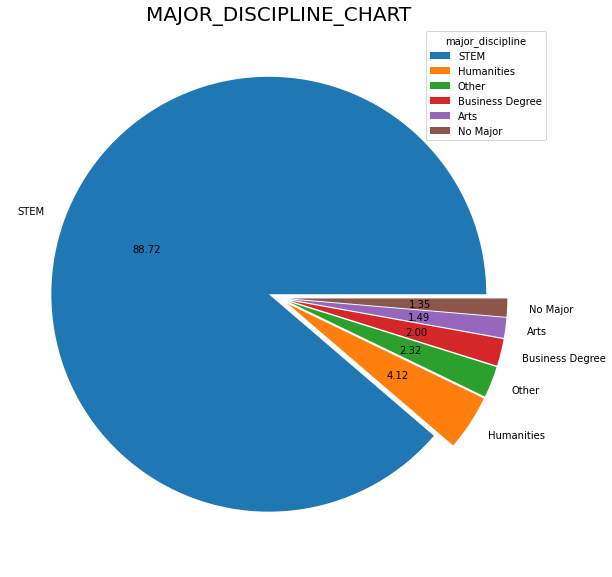

In [334]:
#Pie Plot
print('Fig 1.5')
piechart('major_discipline',(15,10))

Major_Discipline contains 3125 missing points. STEM accounts for 88% of the Disciplines.Therefore missing points will be replaced with STEM

In [335]:
data.major_discipline.fillna('STEM',inplace=True)
data.major_discipline.replace(['STEM','Humanities','Arts','Business Degree','No Major','Other'],[0,1,2,3,4,5],inplace=True)

In [336]:
missing(data,'education_level')

Missing Values in education_level :  512


In [337]:
data.education_level.value_counts()

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

In [338]:
#Fill Missing values in Education Level with Graduate
data.education_level.fillna('Graduate',inplace=True)

In [339]:
# custom Encoding Of Education Level
data.education_level.replace(['Primary School','High School','Graduate','Masters','Phd'],[0,1,2,3,4],inplace=True)

In [340]:
#Missing points
missing(data,'enrolled_university')

Missing Values in enrolled_university :  417


Fig 1.6


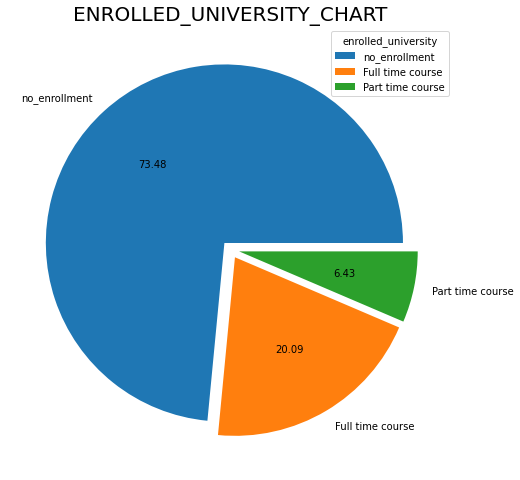

In [341]:
#Pie Chart
print('Fig 1.6')
piechart('enrolled_university',(8,10))

In [342]:
#Fill missing entries in enrolled data and  Custom encoding
data.enrolled_university.fillna('no_enrollment',inplace=True)
data.enrolled_university.replace(['no_enrollment','Part time course','Full time course'],[0,1,2],inplace=True)

In [343]:
missing(data,'relevent_experience')

Missing Values in relevent_experience :  0


No Missing Value in Relevant Experience

In [344]:
#Custom Encoding
data.relevent_experience.replace(['Has relevent experience','No relevent experience'],[0,1],inplace=True)

In [345]:
data.relevent_experience.value_counts()

0    15316
1     5971
Name: relevent_experience, dtype: int64

In [346]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,0,0,2,0,21,-1.0,0,1,36
1,29725,city_40,0.776,Male,1,0,2,0,15,3.0,0,5,47
2,11561,city_21,0.624,NaN,1,2,2,0,5,-1.0,0,0,83
3,33241,city_115,0.789,NaN,1,0,2,3,0,-1.0,0,0,52
4,666,city_162,0.767,Male,0,0,3,0,21,3.0,1,4,8


In [347]:
missing(data,'gender')

Missing Values in gender :  5016


In [348]:
data.gender.value_counts()

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

Fig 1.7


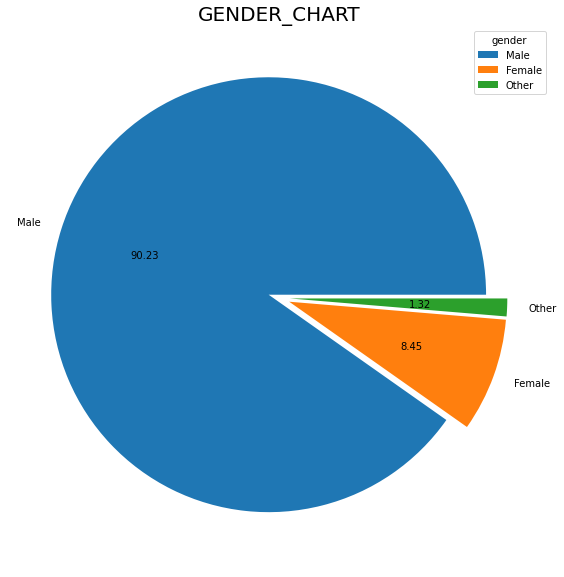

In [349]:
#Pie Plot
print('Fig 1.7')
piechart('gender',(10,10))

Male Gender Make up for 90% of the candidates

In [350]:
#fill missing Gender points with Male
data.gender.fillna('Male',inplace=True)
data.gender.replace(['Female','Male','Other'],[0,1,2],inplace=True)


In [351]:
#Missning points
missing(data,'city_development_index')

Missing Values in city_development_index :  0


There are no missing entries in city development index column

Fig 1.8


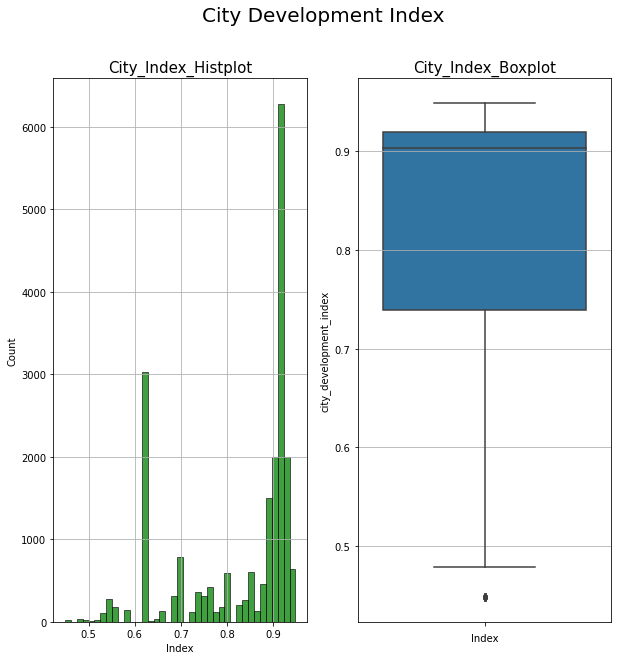

In [352]:
#Plot of City Development Index
print('Fig 1.8')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
fig.suptitle('City Development Index',size=20)
ax1.set_title('City_Index_Histplot',size=15)
ax1.grid('True')
ax1.set_xlabel('Index',size=10)
sns.histplot(data.city_development_index,color='g',ax=ax1)
ax2.set_title('City_Index_Boxplot',size=15)
ax2.grid('True')
ax2.set_xlabel('Index',size=10)
sns.boxplot(y=data.city_development_index,ax=ax2)
plt.show()

Fig 1.8 above shows that,city devwlopment index is constrained between the values of 0 and 1. The boxplot shows that there are outliers 

In [353]:
missing(data,'city')

Missing Values in city :  0


In [354]:
data.city.value_counts()

city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
            ... 
city_166       4
city_129       3
city_111       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64

In [355]:
# We extract the codes at the end of the entries in city example for 'city_140' we extract 140
city=data.city.values
b=[]
for x in city:
    b.append(x[-3:])
c=[]
for x in range(len(b)):
    if b[x].isdigit():
        c.append(x)
    else:
        b[x]=b[x].replace('_','')
        b[x]=b[x].replace('y','')
        c.append(b[x])
c=[int(x) for x in c]
c[:5]
data.city=c
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0,0.920,1,0,0,2,0,21,-1.0,0,1,36
1,29725,40,0.776,1,1,0,2,0,15,3.0,0,5,47
2,11561,21,0.624,1,1,2,2,0,5,-1.0,0,0,83
3,33241,3,0.789,1,1,0,2,3,0,-1.0,0,0,52
4,666,4,0.767,1,0,0,3,0,21,3.0,1,4,8


In [356]:
#Length Of Unique Values in City
print('No Of Unique Cities: ',len(data.city.unique()))

No Of Unique Cities:  11006


Fig 1.9


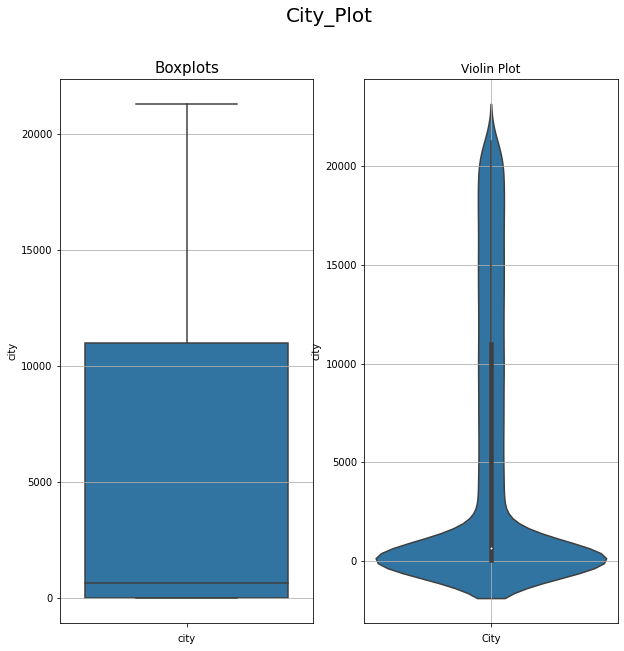

In [357]:
#City Plot
print('Fig 1.9')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
fig.suptitle('City_Plot',size=20)
ax1.set_title('Boxplots',size=15)
ax1.grid('True')
sns.boxplot(y=data.city,ax=ax1)
ax1.set_xlabel('city',size=10)
ax2.set_title('Violin Plot')
ax2.set_xlabel('City',size=10)
ax2.grid('True')
sns.violinplot(y=data.city,ax=ax2)
ax2.grid('True')
plt.show()

Fig 1.9 Is a plot of City Codes after extraction. The Boxplot on the right shows that There is a large range of values for city. It ranges from 0-20000 while it has a median of about 5000.Most of its values are within the range of 0-5000 as seen from the violin plot on the right side of fig 1.9.

In [358]:
#The Log of the values for City will be Taken to reduce and restrain to the range of other features
data.city=np.log10(data.city+1)
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0.000000,0.920,1,0,0,2,0,21,-1.0,0,1,36
1,29725,1.612784,0.776,1,1,0,2,0,15,3.0,0,5,47
2,11561,1.342423,0.624,1,1,2,2,0,5,-1.0,0,0,83
3,33241,0.602060,0.789,1,1,0,2,3,0,-1.0,0,0,52
4,666,0.698970,0.767,1,0,0,3,0,21,3.0,1,4,8


In [359]:
train_data.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

           Fig 2.0            


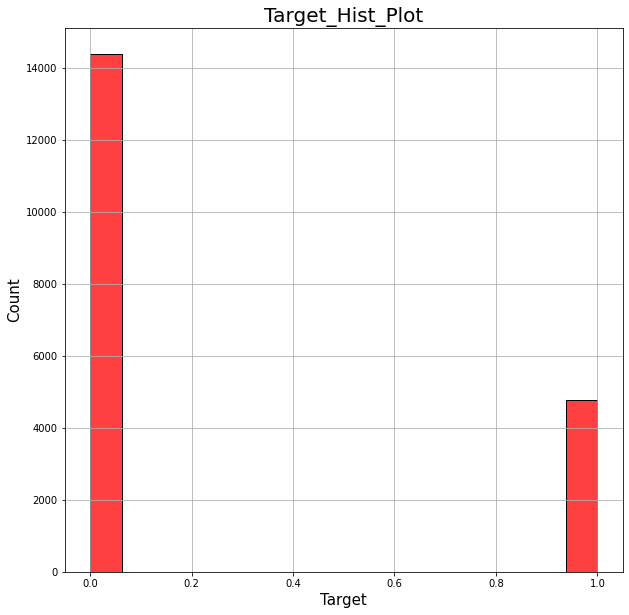

In [360]:
#Plot of Target
print('{:^30}'.format('Fig 2.0'))
plt.figure(figsize=(10,10))
sns.histplot(y_train,color='r')
plt.xlabel('Target',size=15)
plt.ylabel('Count',size=15)
plt.title('Target_Hist_Plot',size=20)
plt.grid('True')
plt.show()

Fig 2.0 Above is a plot of Target values for the dataset if  consists of values 0 and 1 in an imblanced ratio of 4:1 in favour of the 0 class. This can be very problematic to our model if not handled because it make it to be skewed to the 0 class amd may label most points as zero due to this effect.

In [361]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0.000000,0.920,1,0,0,2,0,21,-1.0,0,1,36
1,29725,1.612784,0.776,1,1,0,2,0,15,3.0,0,5,47
2,11561,1.342423,0.624,1,1,2,2,0,5,-1.0,0,0,83
3,33241,0.602060,0.789,1,1,0,2,3,0,-1.0,0,0,52
4,666,0.698970,0.767,1,0,0,3,0,21,3.0,1,4,8


In [362]:
#Split Data Back into test and Train
#Drop Id Column
data.drop('enrollee_id',axis=1,inplace=True)
train_data=data.iloc[:train_data.shape[0]]
test_data=data.iloc[train_data.shape[0]:]
train_data['target']=y_train
print('Train_Data_Shape: ',train_data.shape,'\n\n','Test_Data_Shape: ',test_data.shape)

Train_Data_Shape:  (19158, 13) 

 Test_Data_Shape:  (2129, 12)


<ipython-input-362-20e30de339e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target']=y_train


In [363]:
train_data.head(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.000000,0.920,1,0,0,2,0,21,-1.0,0,1,36,1.0
1,1.612784,0.776,1,1,0,2,0,15,3.0,0,5,47,0.0
2,1.342423,0.624,1,1,2,2,0,5,-1.0,0,0,83,0.0
3,0.602060,0.789,1,1,0,2,3,0,-1.0,0,0,52,1.0
4,0.698970,0.767,1,0,0,3,0,21,3.0,1,4,8,0.0


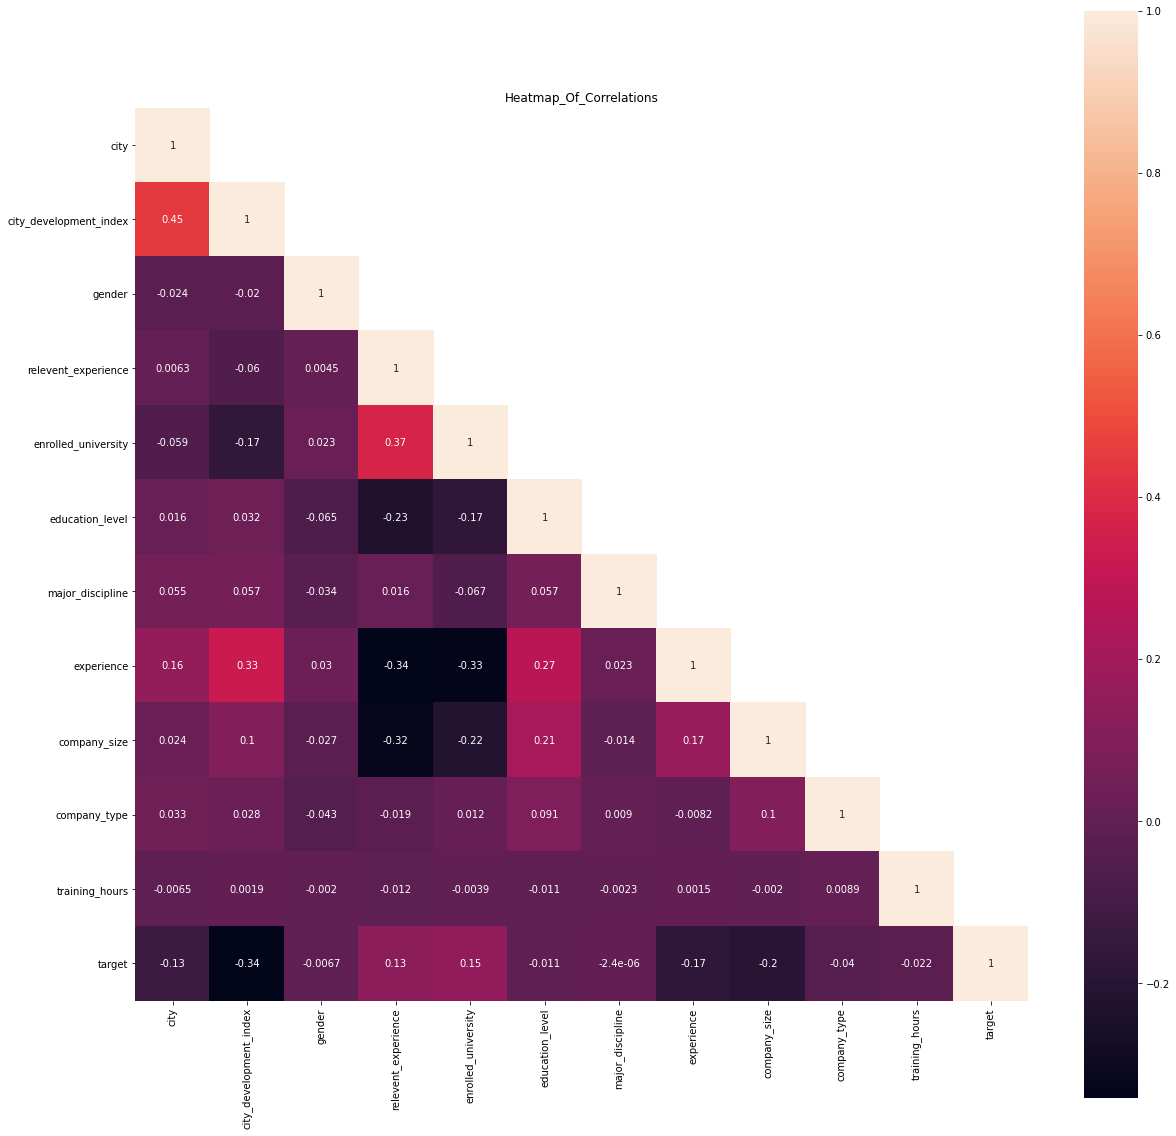

In [364]:
#HeatMap Of Correllations
plt.figure(figsize=(20,20))
corrmat=train_data.corr()
mask=np.array(corrmat)
mask[np.tril_indices_from(corrmat)]=False
sns.heatmap(corrmat,mask=mask,vmax=1.0,square=True,annot=True)
plt.title('Heatmap_Of_Correlations')
plt.show()

In [365]:
#PCA
seed=42
pca=PCA(n_components=2,random_state=42)
pca.fit(train_data.drop('target',axis=1))
z=pca.transform(train_data.drop('target',axis=1))
pca.explained_variance_ratio_

array([0.98286426, 0.0129036 ])

From the explained variance ratio above of the Dimensionally reduced data. The first Principal component contains 98% of the information and sufficiently describes the whole data. This is and indication that the Features are linearly dependent and may have much colinearity among them.

In [366]:
#Clustering
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(train_data.drop('target',axis=1))
km=kmeans.transform(train_data.drop('target',axis=1))
labels=kmeans.labels_
centers=kmeans.cluster_centers_

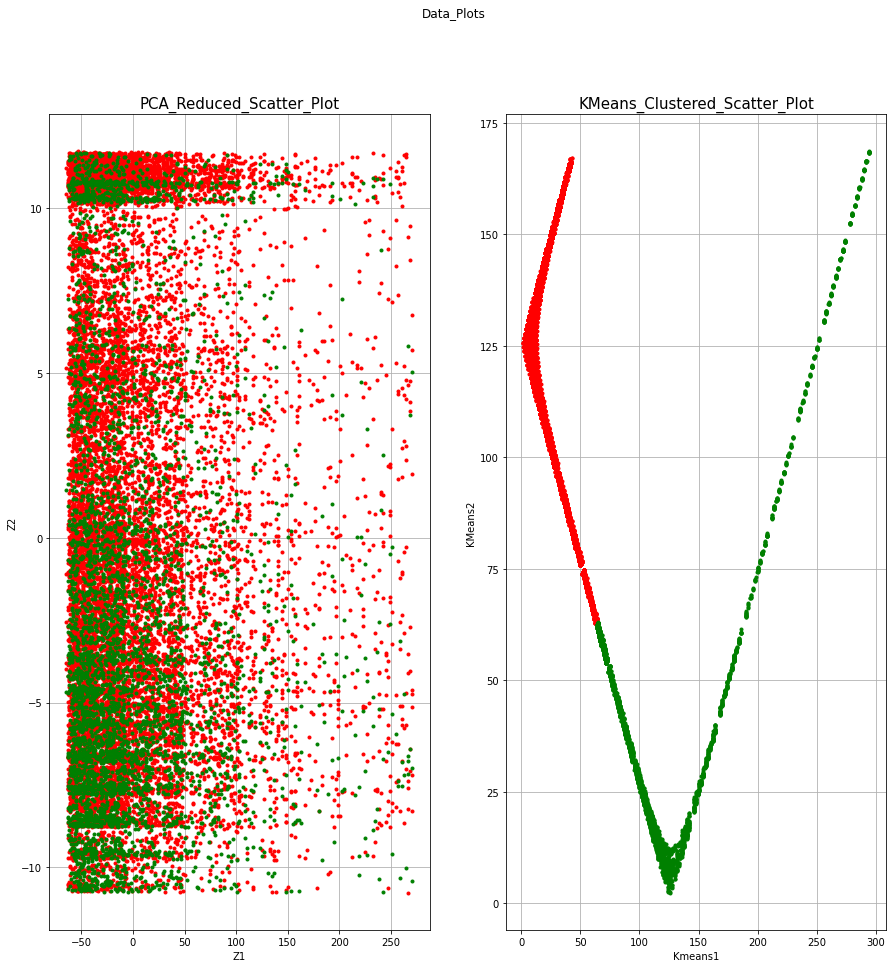

In [367]:
#Plot
z_data=pd.DataFrame({'z1':z[:,0],'z2':z[:,1],'target':y_train})
cluster_data=pd.DataFrame({'z1':km[:,0],'z2':km[:,1],'target':labels})
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Data_Plots')
ax1.set_title('PCA_Reduced_Scatter_Plot',size=15)
ax1.set_xlabel('Z1')
ax1.grid('True')
ax1.plot(z_data.z1[z_data.target==0],z_data.z2[z_data.target==0],'r.')
ax1.plot(z_data.z1[z_data.target==1],z_data.z2[z_data.target==1],'g.')
ax1.set_ylabel('Z2')
ax2.set_title('KMeans_Clustered_Scatter_Plot',size=15)
ax2.set_xlabel('Kmeans1');ax2.set_ylabel('KMeans2')
ax2.grid('True')
ax2.plot(cluster_data.z1[cluster_data.target==0],cluster_data.z2[cluster_data.target==0],'r.')
ax2.plot(cluster_data.z1[cluster_data.target==1],cluster_data.z2[cluster_data.target==1],'g.')
plt.show()
                                                      

### MODEL BUILDING AND PREDICTION

We Will Use Roc_Auc as the metric for Optimization and Evaluation of our Models. We will also we predicting Probabilities instead of Actual Classes. We will also be Using Cross Validation To Prevent Overfitting

In [368]:
#STRATIFIED SHUFFLE SPLIT
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for x,y in split.split(train_data,train_data.target):
    x_train=train_data.loc[x]
    val_test=train_data.loc[y]
y_train=x_train.target.values
y_val=val_test.target.values
x_train.drop('target',axis=1,inplace=True)
val_test.drop('target',axis=1,inplace=True)
print("X_Train: ",x_train.shape," \n\n",'Validation_Test: ',val_test.shape)

X_Train:  (15326, 12)  

 Validation_Test:  (3832, 12)


In [370]:
#STANDARD SCALING
scaler=StandardScaler()
scaler.fit(data)
x_train_scaled=scaler.transform(x_train)
val_test_scaled=scaler.transform(val_test)
test_scaled=scaler.transform(test_data)
print('Train_Data_Scaled: ',x_train_scaled.shape,'\n\n','Test_Data :',test.shape)


Train_Data_Scaled:  (15326, 12) 

 Test_Data : (2129, 24)


In [371]:
#Function For Evaluating Metrics
def score(model,x,y,Method):
    pred=cross_val_predict(model,x,y,cv=5)
    pred_proba=cross_val_predict(model,x,y,cv=5,method=Method)[:,1]
    print('Confusion_Matrix: ','\n\n',confusion_matrix(y,pred))
    print('Precision_Score: ',round(precision_score(y,pred),3),'\n\n','Recall_Score: ',round(recall_score(y,pred),3))
    print('Roc_Auc_Score: ',round(roc_auc_score(y,pred_proba),3))
    return pred,pred_proba
          
          

In [372]:
#ROC PLOT FUNCTION
def roc_plot(algorithm,y_true,y_pred_proba):
    fpr,tpr,thresholds=roc_curve(y_true,y_pred_proba)
    plt.figure(figsize=(10,10))
    plt.grid('True')
    plt.title(algorithm.capitalize()+' Roc Plot',size=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr,tpr,'r-',lw=2)
    plt.axis([0,1,0,1])
    plt.plot([0,1],[0,1],'g--')
    plt.show()

In [373]:
log_clf=LogisticRegression(C=1,random_state=42)

In [374]:
log_pre,log_proba=score(log_clf,x_train_scaled,y_train,'predict_proba')

Confusion_Matrix:  

 [[10732   772]
 [ 2773  1049]]
Precision_Score:  0.576 

 Recall_Score:  0.274
Roc_Auc_Score:  0.751


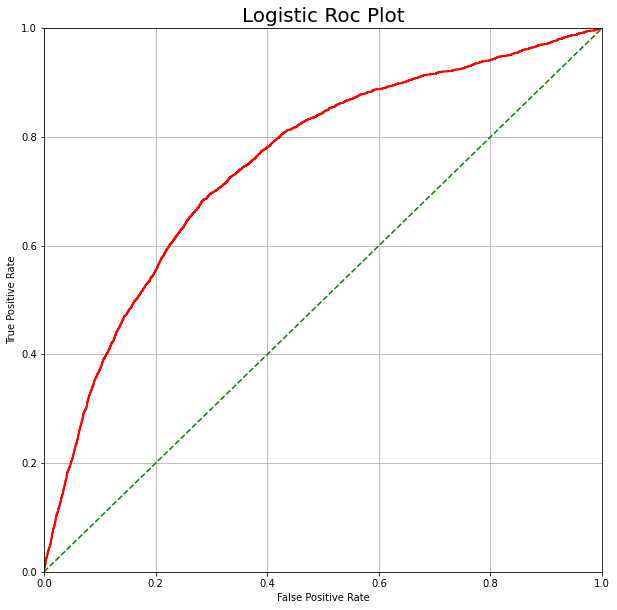

In [375]:
roc_plot('Logistic',y_train,log_proba)

In [376]:
#Test On Validation Data
score(log_clf,val_test_scaled,y_val,'predict_proba')

Confusion_Matrix:  

 [[2674  203]
 [ 672  283]]
Precision_Score:  0.582 

 Recall_Score:  0.296
Roc_Auc_Score:  0.767


(array([0., 1., 0., ..., 0., 0., 0.]),
 array([0.04741782, 0.67963959, 0.10471833, ..., 0.04848982, 0.04178263,
        0.11620947]))

Logistic Regression Gives An Roc_Score of 0.76 on Validation Data

In [ ]:
#HyperParameter Tuning
tree_clf=DecisionTreeClassifier(random_state=42)
grid_params=[{'max_leaf_nodes':[10,20,35,50,100],'min_samples_split':[5,10,20,50],'min_samples_leaf':[5,10,20,30,35,50]}]
grid=GridSearchCV(tree_clf,grid_params,cv=5,scoring='roc_auc')
grid.fit(val_test,y_val)

In [ ]:
cv=grid.cv_results_
cv=pd.DataFrame(cv)
print('Best_Grid_Score: ',grid.best_score_,'\n\n','Best_Grid_Params: ',grid.best_params_)
#Plot Of Grid Results
fig,ax1=plt.subplots(figsize=(10,10))
ax1.grid('True')
plt.title('Grid Search Mean and Std Score Plot')
ax1.plot(cv.index,cv['mean_test_score'],'g*-',lw=3,label='Mean_Test_Score')
ax2=ax1.twinx()
ax2.plot(cv.index.values,cv['std_test_score'],'r*-',lw=3,label='Std_Test_Score')
plt.xlabel('Index_No')
fig.tight_layout()
plt.legend(loc='best')
plt.show()

The plot above represents The mean test score and Std test Score for Grid Search on decision Tree Classifier. The points represents The Mean test Csore While Std Test Score Represnts Std Test Score.
Our Goal is to Get the best score values and the lowest Std test score. Between 80-90 we achieve our Best Test Score and a reasonably low Std Score.

In [377]:
tree_clf=DecisionTreeClassifier(random_state=42,max_leaf_nodes=50,min_samples_split=5,min_samples_leaf=35)
tree_clf.fit(x_train,y_train)


DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=35,
                       min_samples_split=5, random_state=42)

In [378]:
tree_pre,tree_proba=score(tree_clf,x_train,y_train,'predict_proba')

Confusion_Matrix:  

 [[9940 1564]
 [1704 2118]]
Precision_Score:  0.575 

 Recall_Score:  0.554
Roc_Auc_Score:  0.783


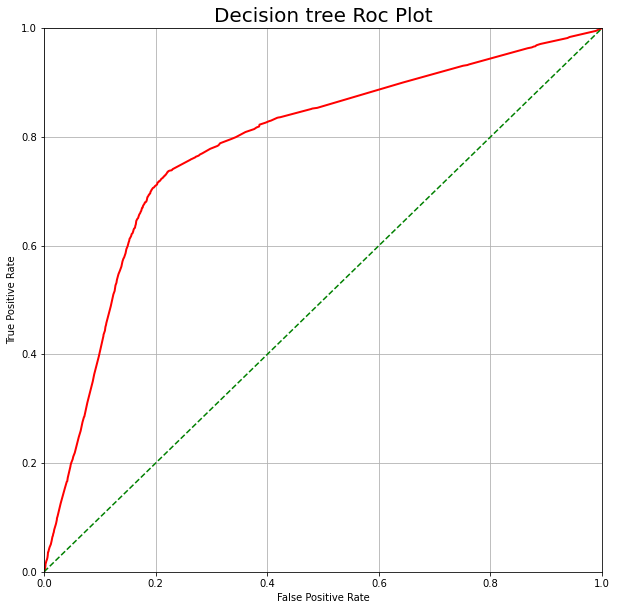

In [379]:
roc_plot('Decision Tree',y_train,tree_proba)

In [380]:
#Validation Test
score(tree_clf,val_test,y_val,'predict_proba')

Confusion_Matrix:  

 [[2549  328]
 [ 495  460]]
Precision_Score:  0.584 

 Recall_Score:  0.482
Roc_Auc_Score:  0.8


(array([0., 1., 0., ..., 0., 0., 0.]),
 array([0.0952381 , 0.66666667, 0.0952381 , ..., 0.19565217, 0.0877193 ,
        0.04054054]))

The Decision Tree Classifier Performs Relatively Better than Our Earlier Logistic Regression Algorithm with a score of 0.799

In [394]:
#Gradeint Boosring
grad_clf=GradientBoostingClassifier(random_state=42,max_leaf_nodes=50,min_samples_leaf=35,min_samples_split=5)
grad_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=50, min_samples_leaf=35,
                           min_samples_split=5, random_state=42)

In [381]:
score(grad_clf,x_train,y_train,'predict_proba')

Confusion_Matrix:  

 [[10149  1355]
 [ 1915  1907]]
Precision_Score:  0.585 

 Recall_Score:  0.499
Roc_Auc_Score:  0.795


(array([1., 0., 0., ..., 0., 1., 0.]),
 array([0.52210964, 0.11427299, 0.08329486, ..., 0.0662988 , 0.5939745 ,
        0.46119906]))

In [382]:
#Gradient Boosting Classifier on Validation Test Data
score(grad_clf,val_test,y_val,'predict_proba')

Confusion_Matrix:  

 [[2577  300]
 [ 520  435]]
Precision_Score:  0.592 

 Recall_Score:  0.455
Roc_Auc_Score:  0.813


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.08593021, 0.46424794, 0.06826949, ..., 0.11350118, 0.04554213,
        0.06547844]))

Gradient Boosting Classifier Acheives an Roc_Auc_Score of 0.812 on Validation Test

## GAINING INSIGHTS INTO WHY CANDIDATES DECIDES TO STAY OR LEAVE THE COMPANY USING THE MODELS.

In [401]:
x_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17855,1.342423,0.624,1,0,0,2,0,10,3.0,0,1,90
17664,4.247114,0.920,1,1,0,0,0,5,-1.0,0,0,15
13404,1.707570,0.896,1,0,0,2,0,12,6.0,4,5,36
13366,4.126034,0.920,1,0,0,2,0,5,4.0,1,1,53
15670,1.832509,0.855,0,0,2,2,0,5,-1.0,0,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...
10398,1.832509,0.855,1,0,0,2,0,13,3.0,0,1,94
859,2.934498,0.920,0,0,0,3,0,10,3.0,0,1,16
10566,1.568202,0.893,0,0,0,3,0,14,4.0,0,1,34
3085,1.342423,0.624,0,0,0,2,0,15,2.0,1,2,112


In [395]:
#Gradient Boosting Feature Importances
z_grad=pd.DataFrame()
z_grad['Features']=data.columns.values
z_grad['Importance_Rank']=grad_clf.feature_importances_
z_grad=z_grad.sort_values(by='Importance_Rank',ascending=False)
z_grad

,Features,Importance_Rank
1,city_development_index,0.572025
8,company_size,0.270903
5,education_level,0.056385
7,experience,0.023558
10,last_new_job,0.018239
0,city,0.017495
11,training_hours,0.015234
4,enrolled_university,0.011461
3,relevent_experience,0.009759
9,company_type,0.001786


The Most Important Features Used in Gradient Boosting Regressor are City_Devlopment_Index,Company Size,Education Level,Experience and  Last New in descending oreder of less importance

In [402]:
#Decision Tree Feature Importances
z_tree=pd.DataFrame()
z_tree['Features']=data.columns
z_tree['Importance_Rank']=tree_clf.feature_importances_
z_tree=z_tree.sort_values(by='Importance_Rank',ascending=False)
z_tree

,Features,Importance_Rank
1,city_development_index,0.563899
8,company_size,0.248435
5,education_level,0.068567
0,city,0.032348
3,relevent_experience,0.023383
7,experience,0.022073
10,last_new_job,0.017504
11,training_hours,0.011326
4,enrolled_university,0.008710
6,major_discipline,0.001933


For Decision Tree Classifier The Most Importance Geatures for Differntiating Between  Candidates who left after Training and those who remained Where City_Development_Index,Company_Size,Education Level,City,Relevant Experience and Experience

We will Use RFE Wrapper to Get a Clue of The most Important Features For Logistic Regressiin

In [88]:
from sklearn.feature_selection import RFE

In [89]:
rfe=RFE(log_clf,n_features_to_select=4)
rfe.fit(x_train,y_train)
rfe.ranking_
z_log=pd.DataFrame()
z_log['Features']=data.columns
z_log['Importance_Rank']=rfe.ranking_
z_log.index.name='Index'
z_log=z_log.sort_values(ascending=True,by='Importance_Rank')
z_log

,Features,Importance_Rank
Index,,
1,city_development_index,1
4,education_level,1
5,experience,1
6,company_size,1
19,company_type_Funded Startup,2
3,enrolled_university,3
7,last_new_job,4
2,relevent_experience,5
18,company_type_Early Stage Startup,6


For Our Logistic Regression Classifier The most Importance Features for Decision Making where City_Development_Index,Education Level,Experience, Company Size

Fig 3.0


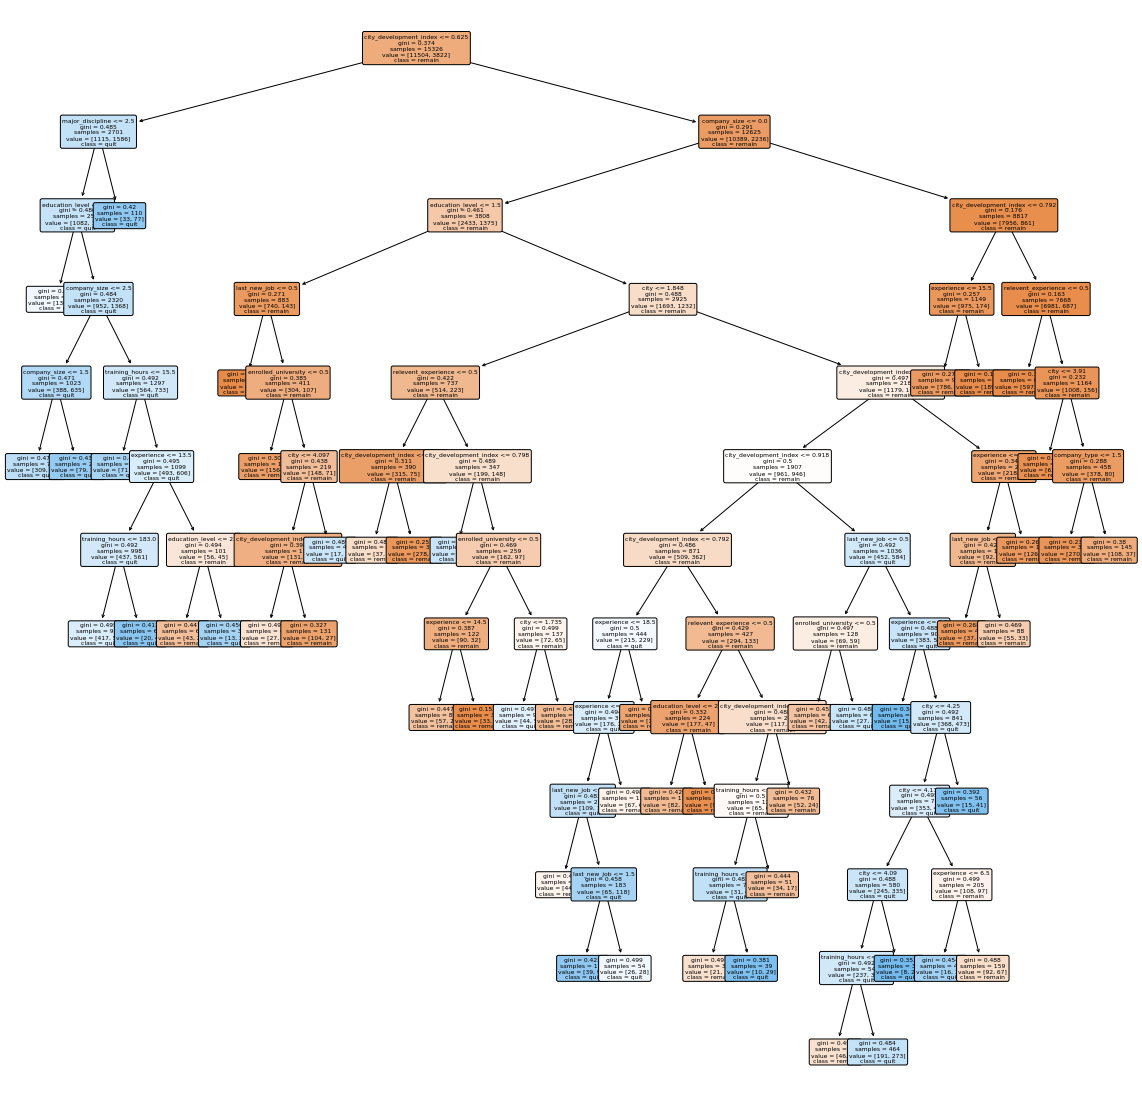

In [404]:
print('Fig 3.0')
plt.figure(figsize=(20,20))
plot_tree(tree_clf,feature_names=data.columns.values,fontsize=6,rounded=True,class_names=['remain','quit'],filled=True)
plt.show()

Fig 3.0 Above Is a graphical plot of the decision tree used for prediction. RFFE wrapper was used to get the features from our Logistic Regression. 

###### So What Can We Say About Our Features?.

1. The Singular Most Important Feature For Decision Making according to our Models Was City Development Index. The Tree Plot on Fig 3.0 Shows us that Candidates with city development index less than 0.625 where more likely to remain more than those with city  development index. Which Means the decisuon by Candidates to Remain in the company was inversely Proportional to the City Development index.


2. Other Features Necessary for Predicting The probabilities of Candidates to Stay Back at The Company or to seek Jobs else where were Education Level Experience or Company Size.

 3.3. Candidates who did not indicate the size of their previous workplace where likely to to remain

A closer study of Fig Will Give Relationship Among These Important Features

In [415]:
#Predicting Test Data
sub_file=sample_submission
sub_file['target']=grad_clf.predict_proba(test_data)
fh=sub_file.to_csv('Submission_File.csv',index=False)
sub_file.tail(10)

,enrollee_id,target
2119,8905,0.728673
2120,9772,0.961909
2121,27163,0.885412
2122,24507,0.706394
2123,21339,0.435703
2124,1289,0.430205
2125,195,0.732542
2126,31762,0.962042
2127,7873,0.921271
2128,12215,0.888016
